<a href="https://colab.research.google.com/github/elabrodsky/portfolio/blob/main/Heart_Disease_Data_Analysis_Python_CASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Key Indicators of Heart Disease (2020 annual CDC survey data of 400k adults related to their health status)**

data:https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Data size: approximately 400 thousand adults in the US, features:

**HeartDisease:** Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

**BMI:** Body Mass Index (BMI)

**Smoking:** Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]

**AlcoholDrinking:** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

**Stroke:** (Ever told) (you had) a stroke?

**PhysicalHealth:** Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)

**MentalHealth:** Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)

**DiffWalking:** Do you have serious difficulty walking or climbing stairs?
**Sex:** Are you male or female?

**AgeCategory:** Fourteen-level age category



Import data and preview

In [ ]:
import numpy as np 
#import matplotlib.pyplot as plt 
import pandas as pd 

datalink = 'https://raw.githubusercontent.com/elabrodsky/tulanemba/main/heart_2020_cleaned.csv'

df = pd.read_table(datalink,sep=',',header=(0)) 
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Convert string data to numeric for all columns

In [ ]:
#convert data to numeric

from sklearn import preprocessing

df_num = df

encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df_num['AgeCategory'] = df_num['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df_num['AgeCategory'] = df_num['AgeCategory'].astype('float')

encode_GenHealth = {'Poor':0, 'Fair':1, 'Good':2,
                      'Very good':3,'Excellent':4}
df_num['GenHealth'] = df_num['GenHealth'].apply(lambda x: encode_GenHealth[x])
df_num['GenHealth'] = df_num['GenHealth'].astype('float')

# Integer encode columns with 2 unique values
for col in ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if df_num[col].dtype == 'O':
        le = preprocessing.LabelEncoder()
        df_num[col] = le.fit_transform(df_num[col])

# One-hot encode columns with more than 2 unique values
df_num = pd.get_dummies(df_num, columns=['Race', 'Diabetic'], prefix = ['Race', 'Diabetic'])
df_num.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,No,16.60,1,0,0,3.0,30.0,0,0,57.0,...,0,0,0,0,0,1,0,0,1,0
1,No,20.34,0,0,1,0.0,0.0,0,0,80.0,...,0,0,0,0,0,1,1,0,0,0
2,No,26.58,1,0,0,20.0,30.0,0,1,67.0,...,0,0,0,0,0,1,0,0,1,0
3,No,24.21,0,0,0,0.0,0.0,0,0,77.0,...,0,0,0,0,0,1,1,0,0,0
4,No,23.71,0,0,0,28.0,0.0,1,0,42.0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
df_num1 = df_num
#df_num1['HeartDisease'] = df_num1['HeartDisease'].map(dict(Yes=1, No=0))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df_num.iloc[:, 1:].values
y = df_num.iloc[:, 0].values

classes = np.unique(y)
n_classes = len(classes)

features = np.unique(df_num.iloc[:, 1:].columns)

features

array(['AgeCategory', 'AlcoholDrinking', 'Asthma', 'BMI', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'DiffWalking', 'GenHealth',
       'KidneyDisease', 'MentalHealth', 'PhysicalActivity',
       'PhysicalHealth', 'Race_American Indian/Alaskan Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White', 'Sex', 'SkinCancer', 'SleepTime', 'Smoking',
       'Stroke'], dtype=object)

In [ ]:
#split to train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

Run Random Forest on all features

In [ ]:

#define Random forest model
model = RandomForestClassifier(n_estimators=500, bootstrap=True, verbose=False, max_leaf_nodes=10)

#fit model on training data
model.fit(X_train, y_train)
estimator = model.estimators_[10]

#Predict test data
predictions = model.predict(X_test)

print(confusion_matrix(y_test,predictions, labels=classes))

conf = confusion_matrix(y_test,predictions)
new_conf = pd.DataFrame(conf, columns=classes, index=classes)

print(classification_report(y_test,predictions, zero_division=0))
print(accuracy_score(y_test, predictions))

[[116990      0]
 [ 10928      0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.96    116990
           1       0.00      0.00      0.00     10928

    accuracy                           0.91    127918
   macro avg       0.46      0.50      0.48    127918
weighted avg       0.84      0.91      0.87    127918

0.9145702715802311


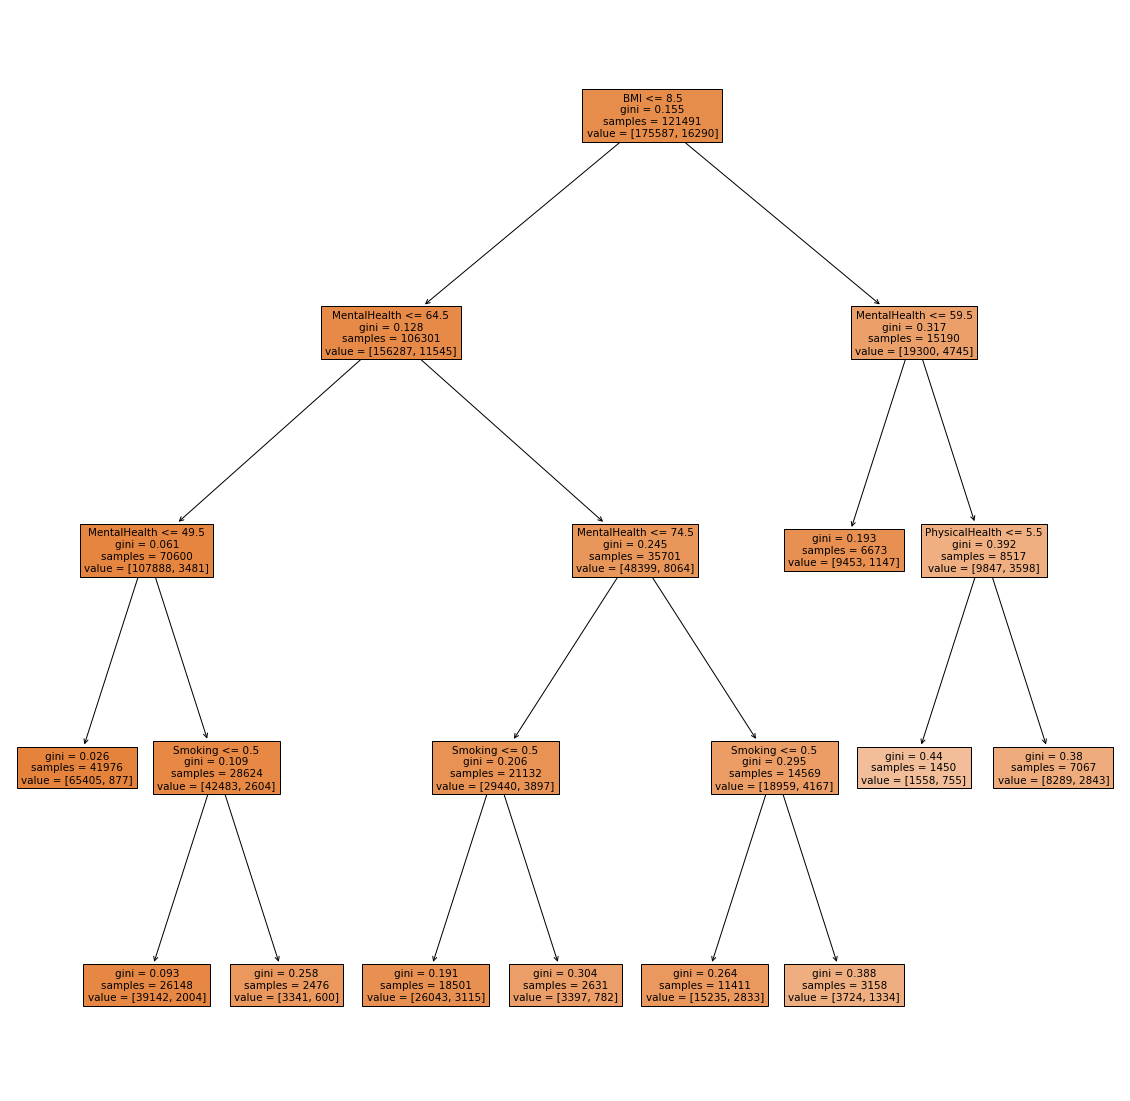

In [ ]:
import matplotlib.pyplot as plt 
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[0], feature_names=features, filled=True)

In [ ]:
import plotly.express as px

In [ ]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features)

figImportance = px.bar(forest_importances, title="Feature Significance", 
                     template="plotly_white", height=800).update_xaxes(categoryorder="total descending")


figImportance.show()


In [ ]:
df_num3 = df_num[['HeartDisease', 'BMI', 'PhysicalHealth',
                    'MentalHealth', 'AgeCategory', 'SleepTime', 'Smoking', 'DiffWalking']]

In [ ]:
df_num3

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,Smoking,DiffWalking
0,0,16.60,3.0,30.0,57.0,5.0,1,0
1,0,20.34,0.0,0.0,80.0,7.0,0,0
2,0,26.58,20.0,30.0,67.0,8.0,1,0
3,0,24.21,0.0,0.0,77.0,6.0,0,0
4,0,23.71,28.0,0.0,42.0,8.0,0,1
...,...,...,...,...,...,...,...,...
319790,1,27.41,7.0,0.0,62.0,6.0,1,1
319791,0,29.84,0.0,0.0,37.0,5.0,1,0
319792,0,24.24,0.0,0.0,47.0,6.0,0,0
319793,0,32.81,0.0,0.0,27.0,12.0,0,0


In [ ]:
X = df_num3.iloc[:, 1:].values
y = df_num3.iloc[:, 0].values

classes1 = np.unique(y)
features = np.unique(df_num3.iloc[:, 1:].columns)

#split to train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

#define Random forest model
model = RandomForestClassifier(n_estimators=500, bootstrap=True, verbose=False, max_leaf_nodes=10)

#fit model on training data
model.fit(X_train, y_train)
estimator = model.estimators_[10]

#Predict test data
predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))

0.914435214042256


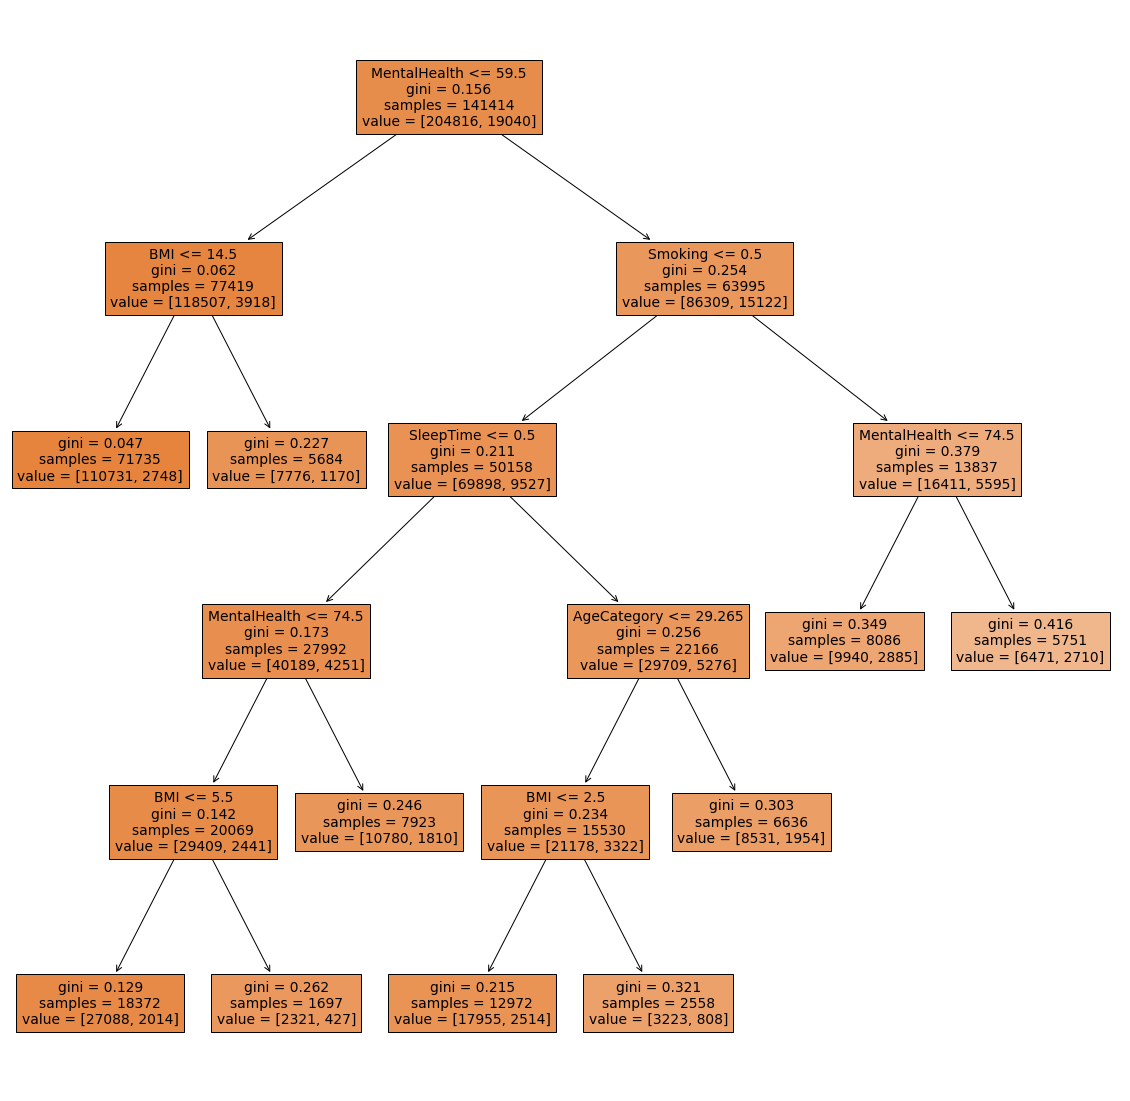

In [ ]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[0], feature_names=features, filled=True)

In [ ]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features)

figImportance = px.bar(forest_importances, title="Feature Significance", 
                     template="plotly_white", height=800).update_xaxes(categoryorder="total descending")


figImportance.show()

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

X = df_num.iloc[:, 1:].values
y = df_num.iloc[:, 0].values

classes1 = np.unique(y)
features = np.unique(df_num.iloc[:, 1:].columns)

#split to train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

#define Random forest model
model = BalancedRandomForestClassifier(max_depth=100, random_state=0, bootstrap=False)

#fit model on training data
model.fit(X_train, y_train)
estimator = model.estimators_[10]

#Predict test data
predictions = model.predict(X_test)

print(confusion_matrix(y_test,predictions, labels=classes))

conf = confusion_matrix(y_test,predictions)
new_conf = pd.DataFrame(conf, columns=classes, index=classes)

print(classification_report(y_test,predictions, zero_division=0))
print(accuracy_score(y_test, predictions))



[[62224 25506]
 [ 1807  6402]]
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     87730
           1       0.20      0.78      0.32      8209

    accuracy                           0.72     95939
   macro avg       0.59      0.74      0.57     95939
weighted avg       0.91      0.72      0.78     95939

0.7153086857273893


In [ ]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features)

figImportance = px.bar(forest_importances, title="Feature Significance", 
                     template="plotly_white", height=800).update_xaxes(categoryorder="total descending")


figImportance.show()

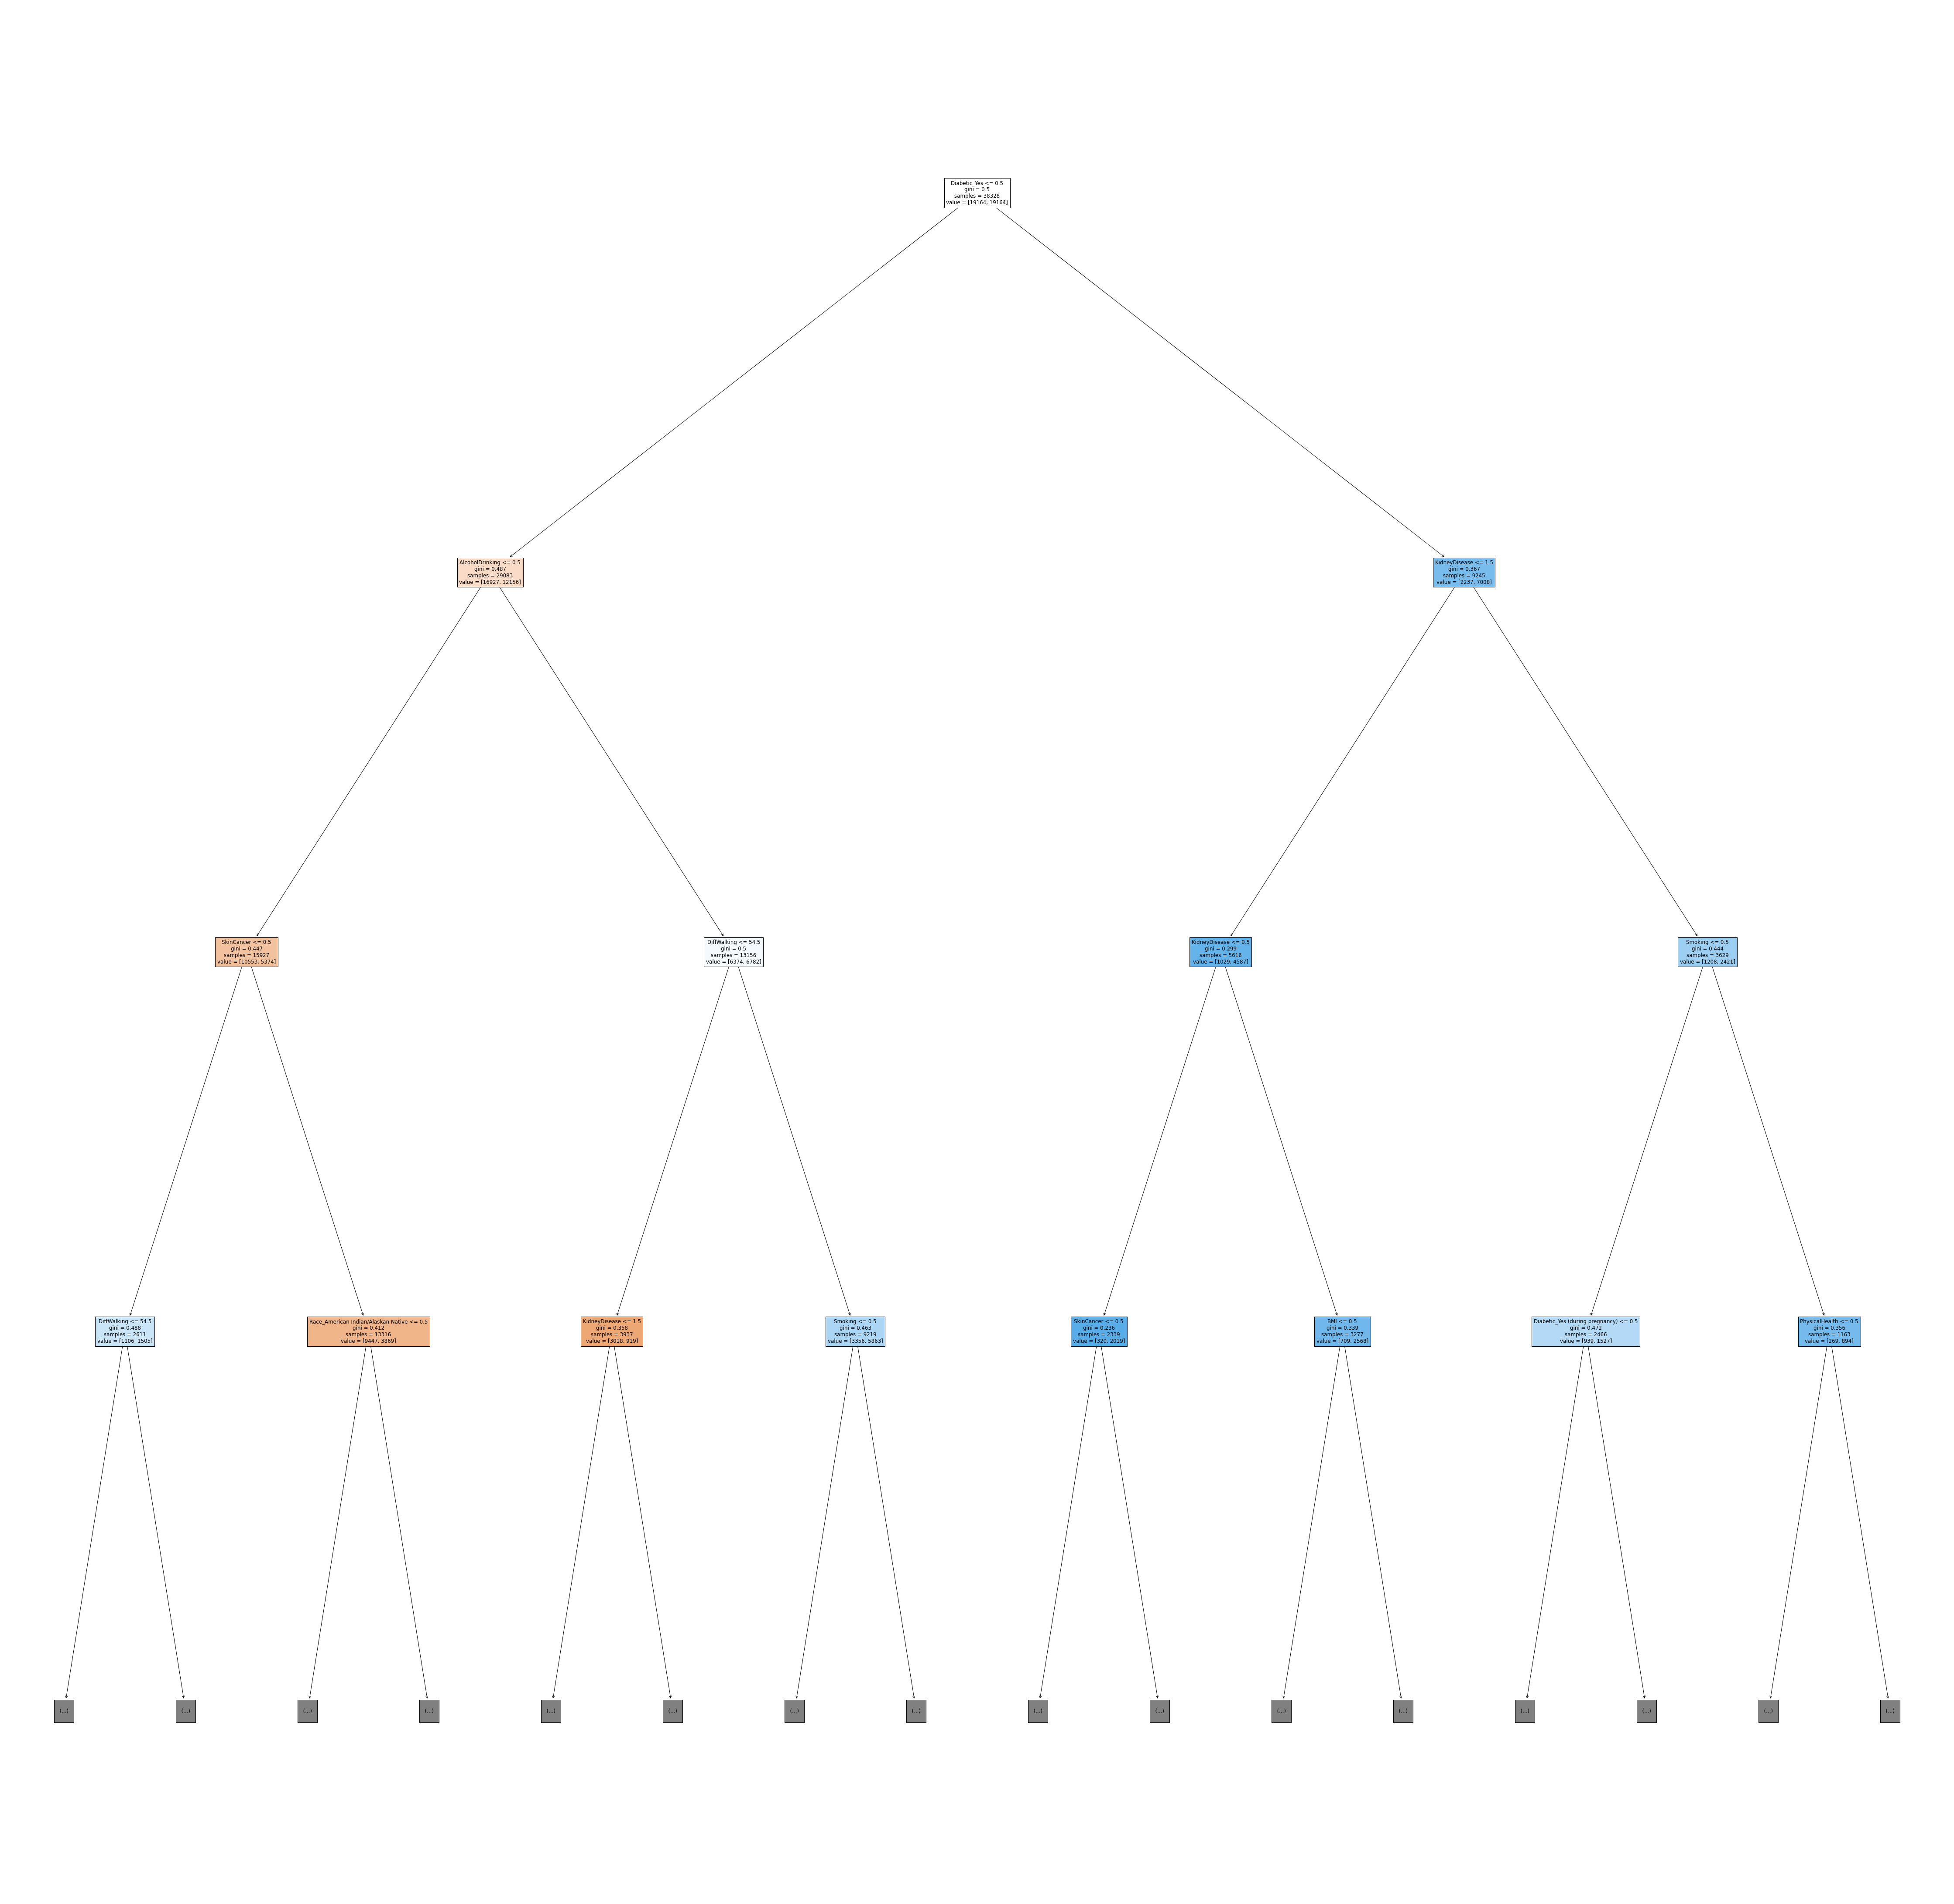

In [ ]:
plt.figure(figsize=(80,80))
_ = tree.plot_tree(model.estimators_[0], max_depth=3, feature_names=features, filled=True)

In [ ]:
for i in range (50,52):
    #define Random forest model
    model = BalancedRandomForestClassifier(max_depth=i, random_state=0)

    #fit model on training data
    model.fit(X_train, y_train)
    estimator = model.estimators_[10]

    #Predict test data
    predictions = model.predict(X_test)

    print(confusion_matrix(y_test,predictions, labels=classes))

    conf = confusion_matrix(y_test,predictions)
    new_conf = pd.DataFrame(conf, columns=classes, index=classes)

    print(classification_report(y_test,predictions, zero_division=0))
    print(accuracy_score(y_test, predictions))

    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=features)

    figImportance = px.bar(forest_importances, title="Feature Significance", 
                     template="plotly_white", height=800).update_xaxes(categoryorder="total descending")

    print('for Random Forest max depth = ', i)
    figImportance.show()

[[56719 31011]
 [ 1938  6271]]
              precision    recall  f1-score   support

           0       0.97      0.65      0.77     87730
           1       0.17      0.76      0.28      8209

    accuracy                           0.66     95939
   macro avg       0.57      0.71      0.53     95939
weighted avg       0.90      0.66      0.73     95939

0.656563024421768


ValueError: Length of values (7) does not match length of index (25)